In [ ]:
%pip install scikit-learn matplotlib seaborn --quiet

Note: you may need to restart the kernel to use updated packages.


In [5]:

%pip install tensorflow --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Load and preprocess
df = pd.read_csv("test.csv") 
df = df.dropna(subset=['crimeaditionalinfo', 'category'])

X = df['crimeaditionalinfo'].astype(str).tolist()
y = df['category'].astype(str).tolist()

In [8]:
# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
num_classes = len(le.classes_)

In [9]:
# Tokenize and pad
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)

X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100)

In [10]:

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

In [11]:
# Model
model = Sequential()
model.add(Embedding(10000, 128, input_length=100))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\Vaibh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
# Train
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/5
781/781 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.6561 - loss: 1.1688 - val_accuracy: 0.7414 - val_loss: 0.7816
Epoch 2/5
781/781 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.7473 - loss: 0.7490 - val_accuracy: 0.7440 - val_loss: 0.7497
Epoch 3/5
781/781 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.7879 - loss: 0.6341 - val_accuracy: 0.7475 - val_loss: 0.7567
Epoch 4/5
781/781 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.8267 - loss: 0.5234 - val_accuracy: 0.7404 - val_loss: 0.8244
Epoch 5/5
781/781 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8629 - loss: 0.4218 - val_accuracy: 0.7358 - val_loss: 0.9294


In [13]:
# Evaluate
y_pred = np.argmax(model.predict(X_val), axis=1)
print(classification_report(y_val, y_pred, target_names=le.classes_))

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
                                                      precision    recall  f1-score   support

                               Any Other Cyber Crime       0.37      0.24      0.29       722
Child Pornography CPChild Sexual Abuse Material CSAM       0.89      0.36      0.52        22
                      Crime Against Women & Children       0.00      0.00      0.00         2
                                Cryptocurrency Crime       0.79      0.34      0.48        32
                      Cyber Attack/ Dependent Crimes       0.99      1.00      1.00       245
                                     Cyber Terrorism       0.00      0.00      0.00         9
      Hacking  Damage to computercomputer system etc       0.34      0.09      0.15       118
                            Online Cyber Trafficking       0.00      0.00      0.00        16
                              Online Financial Fraud       0.81      0.92      0.86      3764
                  

c:\Users\Vaibh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vaibh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vaibh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

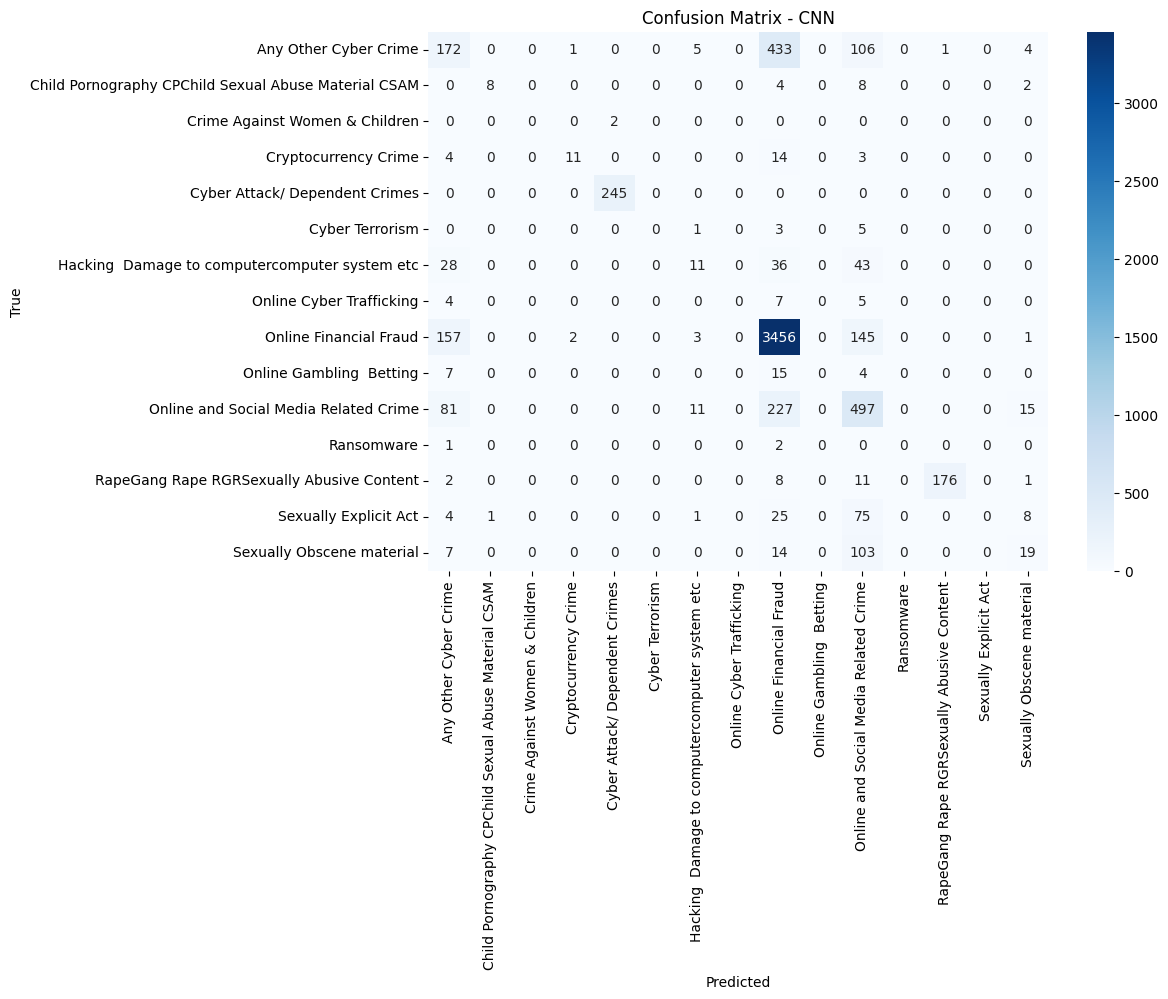

In [14]:

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

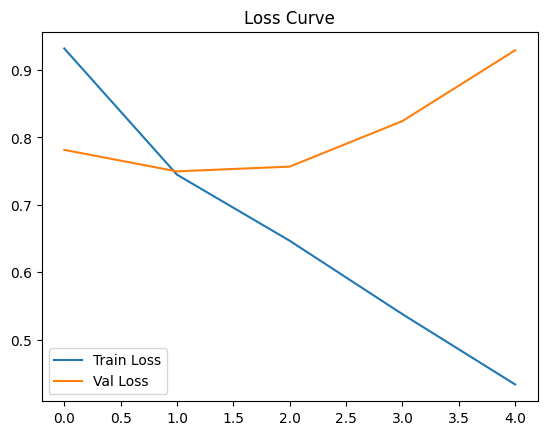

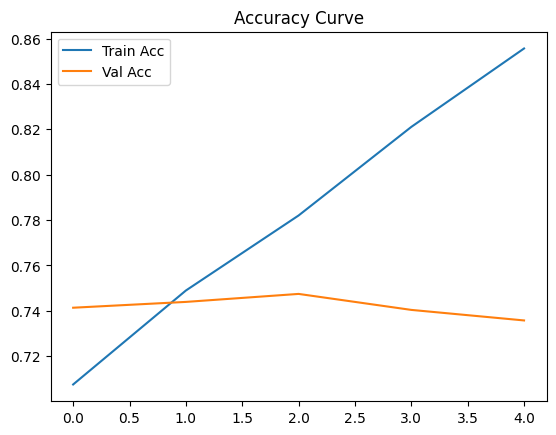

In [15]:
# Loss & Accuracy
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss Curve'); plt.show()

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Accuracy Curve'); plt.show()